In [79]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [25]:
source_train_df = pd.read_csv("train.csv")

source_train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [26]:
source_train_df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [27]:
source_train_df.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [28]:
source_train_df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


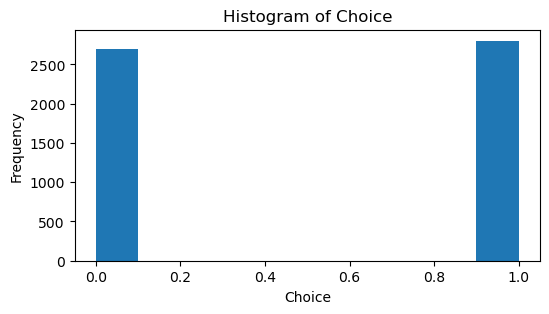

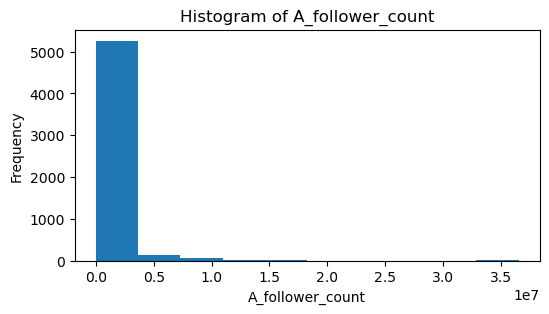

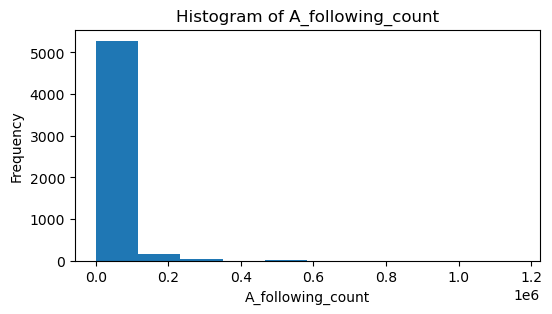

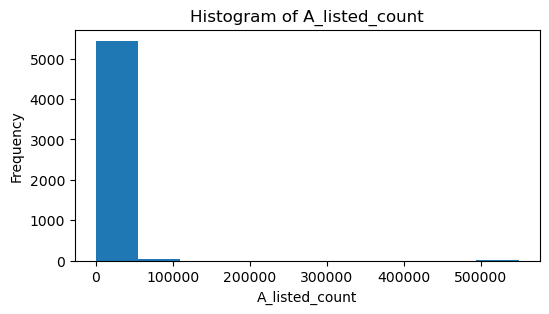

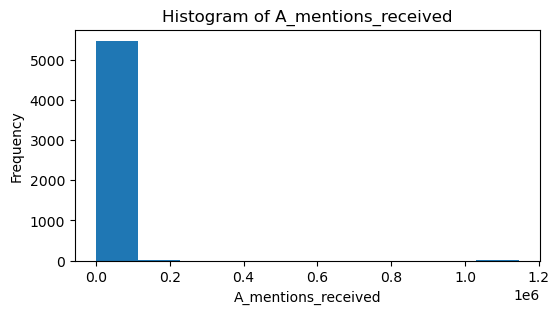

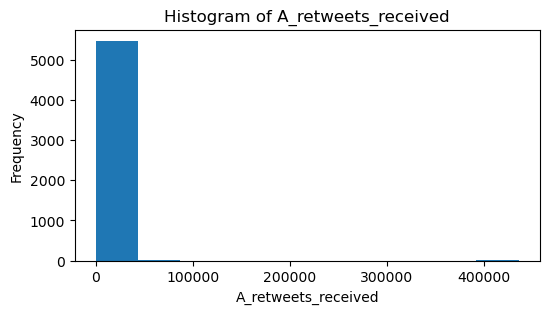

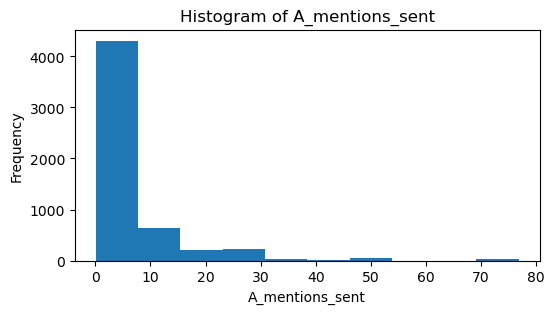

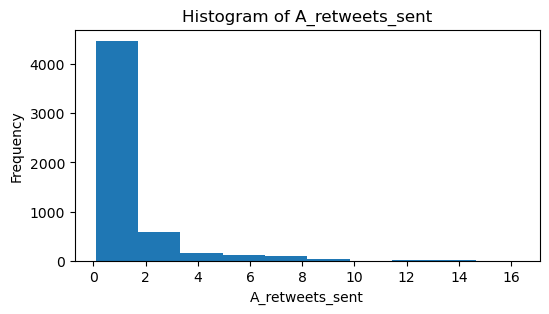

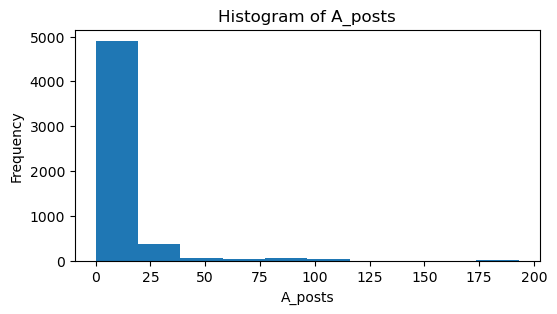

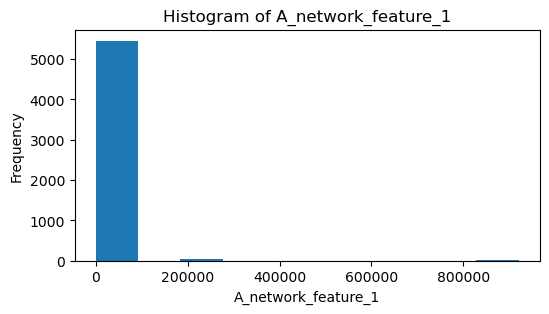

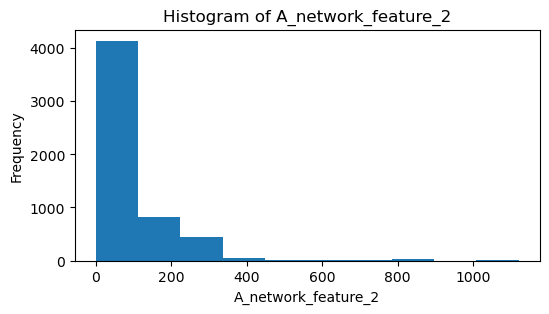

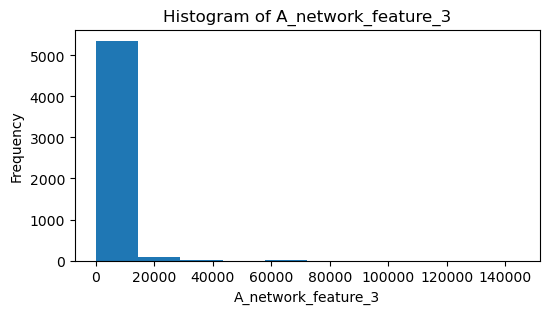

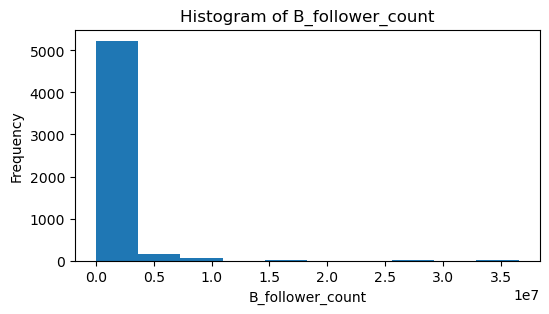

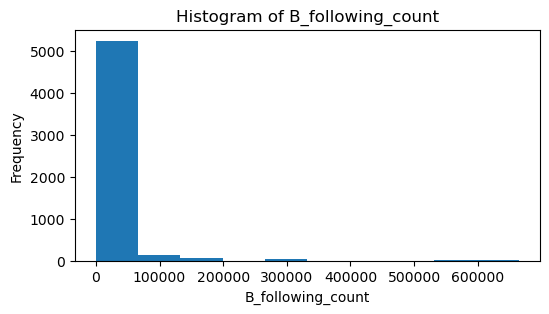

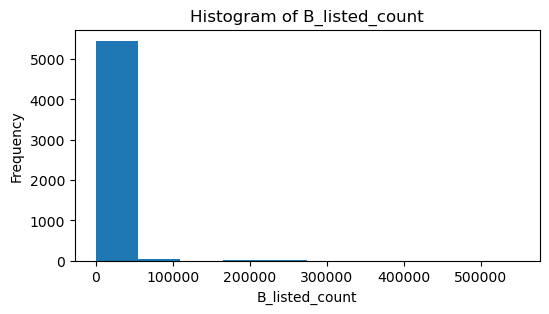

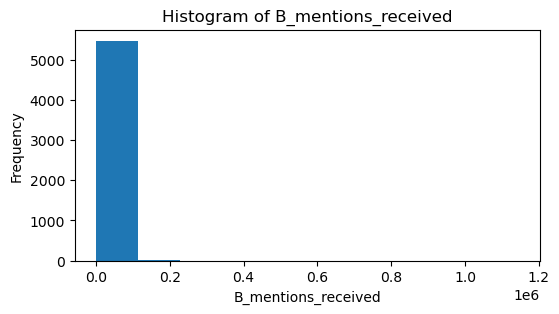

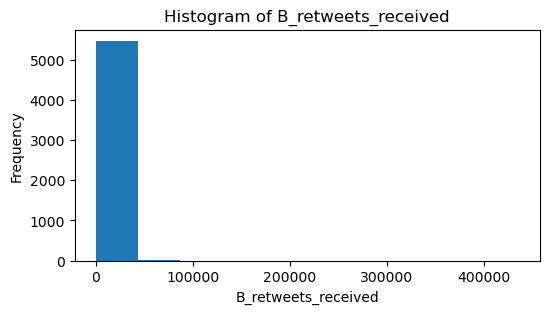

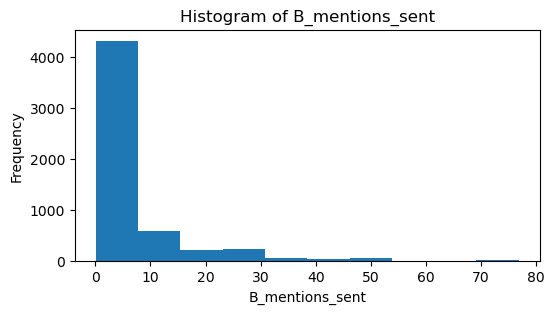

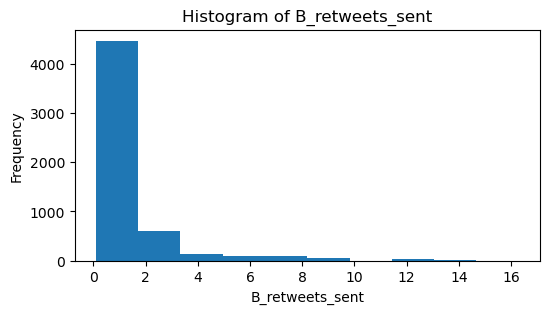

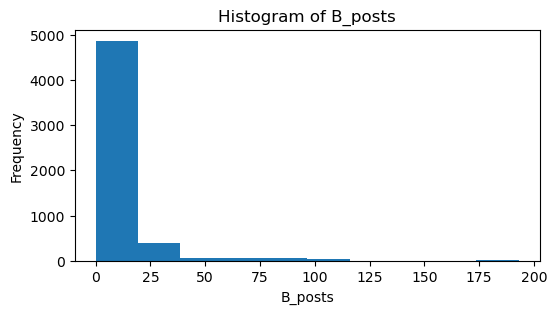

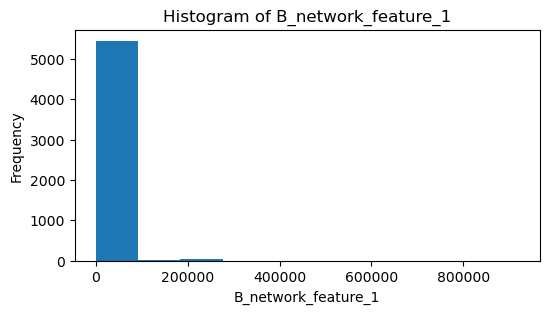

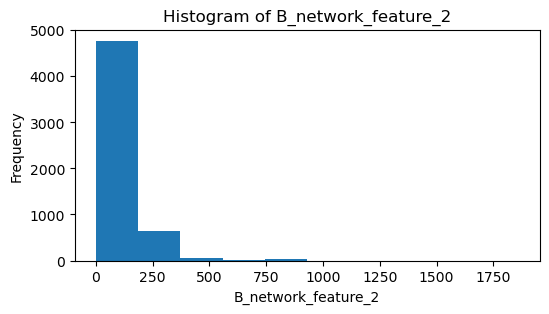

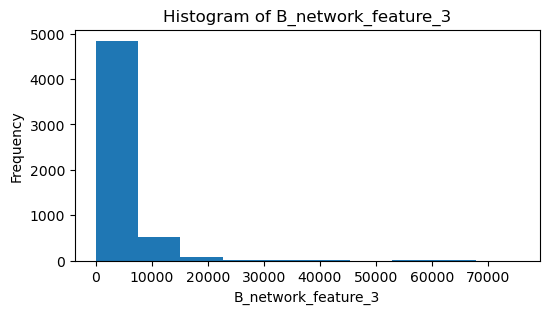

In [31]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_train_df.dtypes.items():
    if column_data_type=='object' :
        plt.pyplot.figure(figsize=(6, 3))
        source_train_df[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
    else:
        plt.pyplot.figure(figsize=(6, 3))
        plt.pyplot.hist(source_train_df[column_name])
        plt.pyplot.xlabel(column_name)
        plt.pyplot.ylabel('Frequency')
        plt.pyplot.title("Histogram of "+column_name)

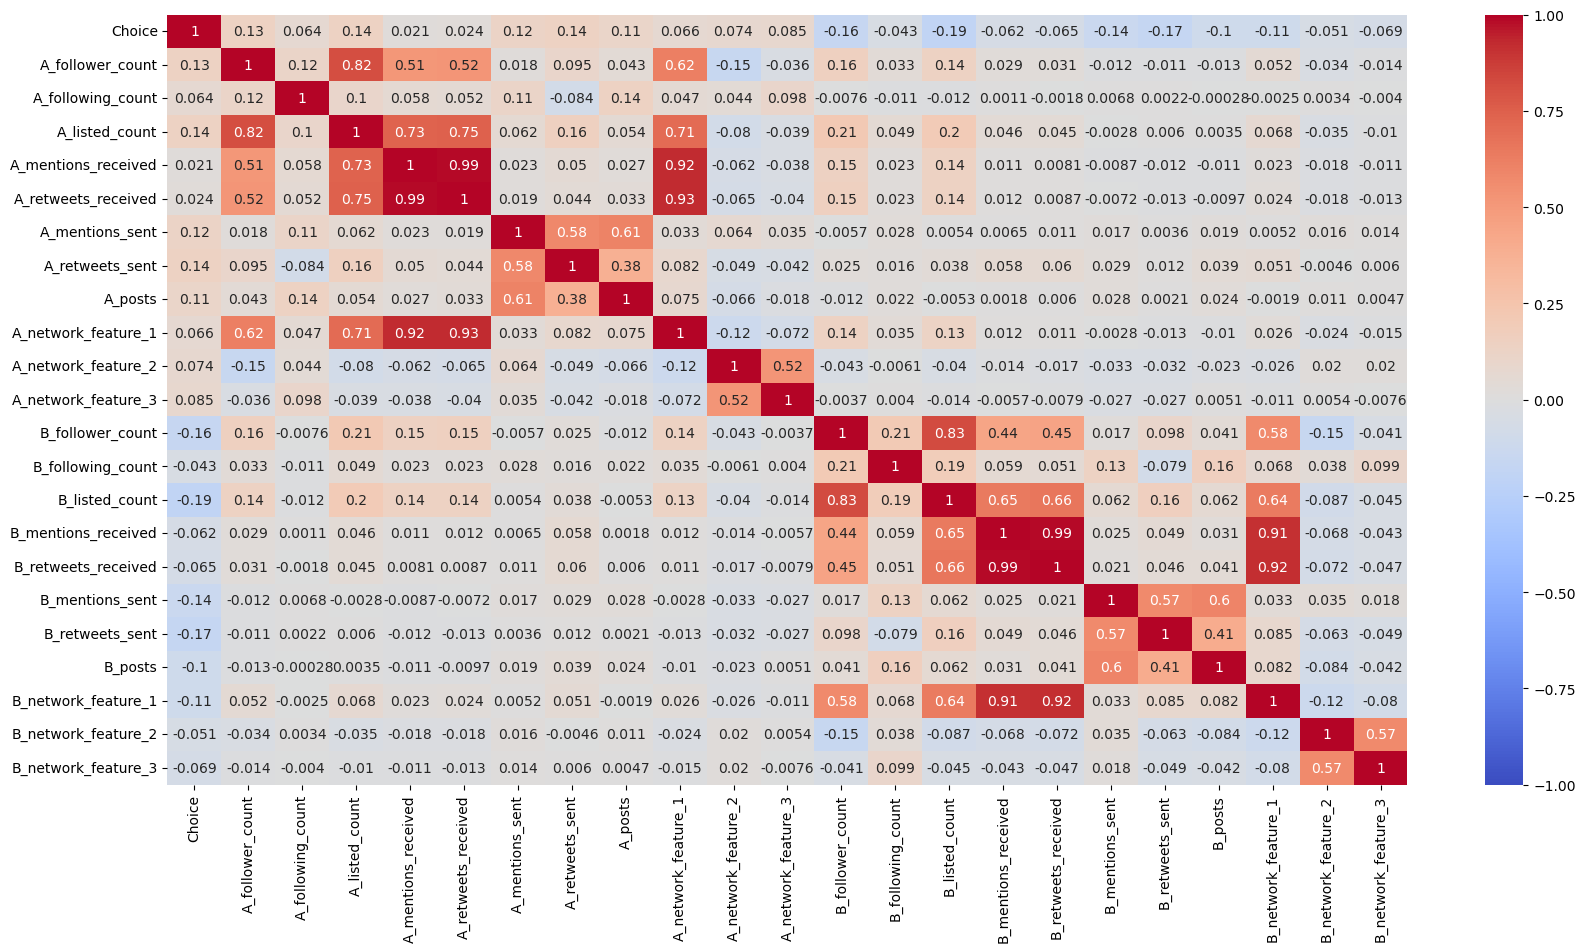

In [34]:
#plot the correlation matrix of the fields as a heat map
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(source_train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

In [35]:
reqd_columns_suffix = [col_name.replace('A_','') for col_name in source_train_df.columns if 'A_' in col_name \
                       and col_name!='A_mentions_received'\
                        and col_name!='A_retweets_received']

reqd_columns_suffix

['follower_count',
 'following_count',
 'listed_count',
 'mentions_sent',
 'retweets_sent',
 'posts',
 'network_feature_1',
 'network_feature_2',
 'network_feature_3']

## TBD WITH TEAM

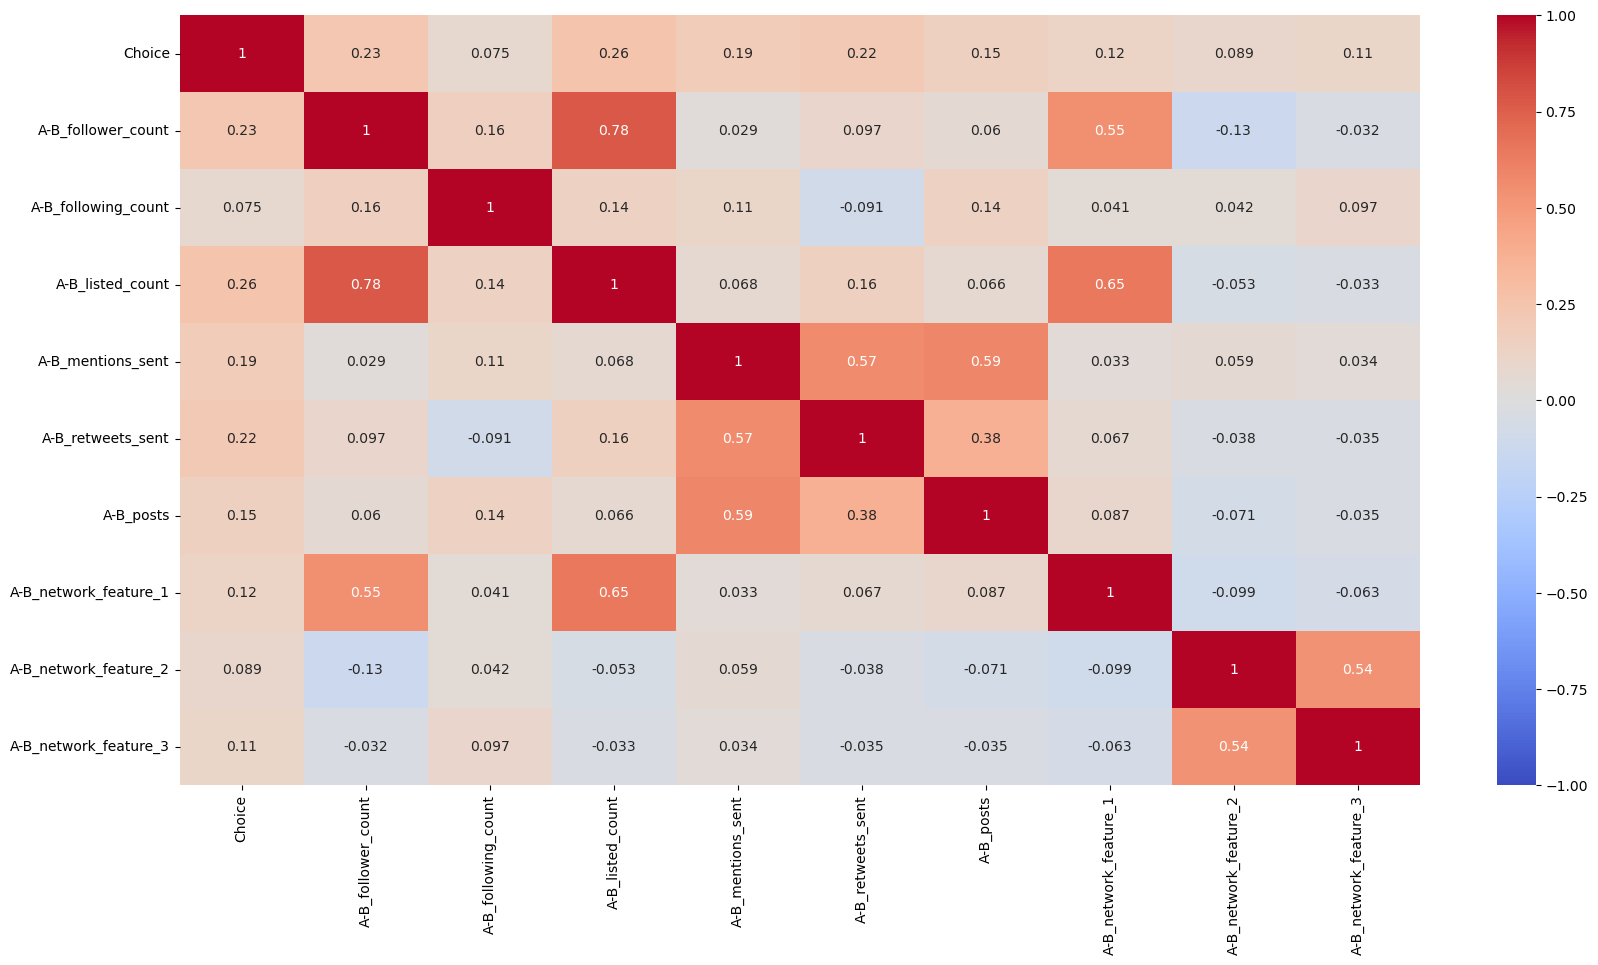

In [36]:
train_df = source_train_df.__deepcopy__()
train_df.drop(['A_mentions_received', 'B_mentions_received'], axis=1, inplace=True)
train_df.drop(['A_retweets_received', 'B_retweets_received'], axis=1, inplace=True)
for column_name in reqd_columns_suffix:
    train_df['A-B_'+column_name] = train_df['A_'+column_name] - train_df['B_'+column_name]
    train_df.drop(['A_'+column_name, 'B_'+column_name], axis=1, inplace=True)

plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), vmax=1, vmin=-1,  cmap="coolwarm", annot=True)
plt.pyplot.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df_normalized = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)


train_df_normalized.head()

,Choice,A-B_follower_count,A-B_following_count,A-B_listed_count,A-B_mentions_sent,A-B_retweets_sent,A-B_posts,A-B_network_feature_1,A-B_network_feature_2,A-B_network_feature_3
0,0.0,0.507400,0.347553,0.510798,0.447178,0.496772,0.482830,0.501019,0.659024,0.386341
1,0.0,0.507632,0.363888,0.511084,0.516176,0.521014,0.510640,0.501167,0.588358,0.335476
2,0.0,0.507932,0.364108,0.512285,0.531015,0.519267,0.507738,0.501104,0.647840,0.369221
3,0.0,0.507606,0.354055,0.512124,0.329091,0.283996,0.424157,0.500097,0.620181,0.336865
4,1.0,0.508414,0.363242,0.514698,0.637644,0.572905,0.550002,0.501308,0.654856,0.346725


In [38]:
from sklearn.model_selection import train_test_split

X = train_df_normalized.drop('Choice', axis=1)  # Features
y = train_df_normalized['Choice']  # Target variable

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66       530
         1.0       0.68      0.71      0.69       570

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.68      0.68      0.68      1100



In [157]:
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

random.seed(123)
params = {
    "n_neighbors" : [4,8,12,16,20],
    "weights" : ['uniform','distance'],
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1',verbose=3)
clf.fit(X_train,y_train)
print(clf.best_params_)

model = KNeighborsClassifier(**clf.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.600 total time=   0.0s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.679 total time=   0.0s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.658 total time=   0.0s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.694 total time=   0.0s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.664 total time=   0.0s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.726 total time=   0.0s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.706 total time=   0.0s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END ....n_neighbors=8, weights=uniform;, score=0.708 total time=   0.0s
[CV 2/5] END ....n_neighbors=8, weights=uniform;

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       530
         1.0       0.72      0.69      0.71       570

    accuracy                           0.70      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.70      0.70      0.70      1100



In [162]:
from sklearn.tree import DecisionTreeClassifier

random.seed(123)
params = {
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
grid2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(X_train,y_train)
print(grid2.best_params_)

model = DecisionTreeClassifier(**grid2.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5] END .......................max_depth=4;, score=0.791 total time=   0.0s
[CV 2/5] END .......................max_depth=4;, score=0.726 total time=   0.0s
[CV 3/5] END .......................max_depth=4;, score=0.769 total time=   0.0s
[CV 4/5] END .......................max_depth=4;, score=0.744 total time=   0.0s
[CV 5/5] END .......................max_depth=4;, score=0.758 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.777 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.741 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.775 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.755 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.777 total time=   0.0s
[CV 1/5] END .......................max_depth=6;, score=0.779 total time=   0.0s
[CV 2/5] END .......................max_depth=6;

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       530
         1.0       0.75      0.75      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



In [164]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

random.seed(123)
params = {
    'max_depth' : [3,5,10,15,20,30],
    'n_estimators': [25,100,150]
}
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(X_train,y_train)

model = RandomForestClassifier(**grid2.best_params_ )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......max_depth=3, n_estimators=25;, score=0.790 total time=   0.1s
[CV 2/5] END ......max_depth=3, n_estimators=25;, score=0.751 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=25;, score=0.774 total time=   0.1s
[CV 4/5] END ......max_depth=3, n_estimators=25;, score=0.751 total time=   0.1s
[CV 5/5] END ......max_depth=3, n_estimators=25;, score=0.773 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.786 total time=   0.5s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.752 total time=   0.5s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.778 total time=   0.5s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.755 total time=   0.5s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.774 total time=   0.5s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.785 total time=   0.8s
[CV 2/5] END .....max_depth=3, n_estimators=150;

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       530
         1.0       0.78      0.77      0.78       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



In [168]:
random.seed(123)
params = {
    'n_estimators': [100,200,300],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [4,6,8]
}
grid2 = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(X_train,y_train) 

model = GradientBoostingClassifier(**grid2.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.787 total time=   2.8s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.756 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.776 total time=   2.9s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.763 total time=   2.9s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.782 total time=   3.8s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.789 total time=  10.9s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.750 total time=  10.6s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.777 total time=  10.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.764 total time=  10.8s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.7

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       530
         1.0       0.78      0.77      0.77       570

    accuracy                           0.77      1100
   macro avg       0.77      0.77      0.77      1100
weighted avg       0.77      0.77      0.77      1100



In [40]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg_model.coef_[0]})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Display the coefficients, sorted by absolute coefficient value
sorted_coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(sorted_coefficients)

                 Feature  Coefficient  Abs_Coefficient
0     A-B_follower_count     7.391954         7.391954
2       A-B_listed_count     5.712535         5.712535
4      A-B_retweets_sent     4.284029         4.284029
7  A-B_network_feature_2     2.701191         2.701191
8  A-B_network_feature_3     2.548791         2.548791
6  A-B_network_feature_1     2.056541         2.056541
1    A-B_following_count     1.934663         1.934663
3      A-B_mentions_sent     1.627347         1.627347
5              A-B_posts     0.961734         0.961734


# Financial Value

In [171]:
source_train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [187]:
def get_value(row):
    value =0
    if row["Choice"] == 1:
        value = row["A_follower_count"]*0.01*0.01*10
    else:
        value = row["B_follower_count"]*0.01*0.01*10
    return value

In [188]:
value_df = source_train_df.__deepcopy__()

value_df["Revenue"] = value_df.apply(get_value, axis=1)

In [189]:
y_inf_pred = model.predict(X)

In [190]:
value_df["Influencer_Prediction"] = y_inf_pred

In [191]:
def inf_get_value(row):
    value =0
    if (row["Choice"] == 1 and row["Influencer_Prediction"]==1):
        value = row["A_follower_count"]*0.015*0.01*10
    elif (row["Choice"] == 0 and row["Influencer_Prediction"]==0):
        value = row["B_follower_count"]*0.015*0.01*10
    else:
        value=0
    return value

In [192]:
value_df["Influencer_Revenue"] = value_df.apply(inf_get_value, axis=1)

In [194]:
value_df['Influencer_Revenue'].sum()

7777158.0105

In [195]:
value_df['Revenue'].sum()

5376568.593

# Tweets

In [80]:
tweets_df = pd.read_csv("tweets.csv")

tweets_df.head(5)

,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,1.410000e+18,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...
1,1.050000e+18,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...
2,1.360000e+18,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul..."
3,3.617900e+09,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...
4,1.360000e+18,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...


In [81]:
import re

tweet_df = pd.DataFrame(columns=['Column_1', 'Column_2', 'Column_3'])

for i in range(len(tweets_df)):
    #i=8#144#23 #146

    text = tweets_df.iloc[i]["text"] #23 #146
    sender_acct = tweets_df.iloc[i][" screen_name"]

    retweet_acct=''

    reply_acct = []
    mention_acct = []


    retweet_pattern = r"RT @(.*?):"

    try:
        retweet_acct = re.findall(retweet_pattern, text)[0]

        data = {'Column_1': [sender_acct, retweet_acct], 'Column_2': [retweet_acct]*2, 'Column_3': ['Retweet','Tweet']}
        tweet_row_df = pd.DataFrame(data)

    except:
        retweet_acct=''

        mention_and_reply_pattern = r"@(.*?) "

        mentioned_and_reply_acct = re.findall(mention_and_reply_pattern, text)

        for acct in mentioned_and_reply_acct:
            if text.startswith('@'+acct):
                reply_acct.append(acct)
                text = text.replace('@'+acct,'').strip()

        mention_acct = [acct for acct in mentioned_and_reply_acct if acct not in reply_acct]

        if (len(reply_acct) + len(mention_acct)) > 0:
            data = {'Column_1': [sender_acct]*(len(reply_acct) + len(mention_acct)),\
                    'Column_2': reply_acct+mention_acct,\
                        'Column_3': (['Reply']*len(reply_acct)) + (['Mention']*len(mention_acct))}
            
            tweet_row_df = pd.DataFrame(data)

        else:
            data = {'Column_1': [sender_acct], 'Column_2': [sender_acct], 'Column_3': ['Tweet']}
            tweet_row_df = pd.DataFrame(data)

    tweet_df = tweet_df.append(tweet_row_df, ignore_index=True)

tweet_df = tweet_df.drop_duplicates()

tweet_df.to_csv("Network_Input.csv")

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

tuples_list = tweet_df[['Column_1','Column_2']].apply(lambda row: tuple(row), axis=1).tolist()

twitter_graph = nx.Graph()
twitter_graph.add_edges_from(tuples_list)

degree_centrality = nx.degree_centrality(twitter_graph)

betweenness_centrality = nx.betweenness_centrality(twitter_graph)

closeness_centrality = nx.closeness_centrality(twitter_graph)



In [84]:
node_arr =[]
degree_arr =[]
for node, degree in degree_centrality.items():
    degree_arr.append(degree)
    node_arr.append(node)

betweenness_arr =[]
for node, betweenness in betweenness_centrality.items():
    betweenness_arr.append(betweenness)

closeness_arr =[]
for node, closeness in closeness_centrality.items():
    closeness_arr.append(closeness)

graph_features_data = {'Node': node_arr, 'Degree': degree_arr, 'Betweeness': betweenness_arr, 'Closeness': closeness_arr}
graph_df = pd.DataFrame(graph_features_data)

In [85]:
degree_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_1"]["Coefficient"].item()

betweenness_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_2"]["Coefficient"].item()

closeness_weight = coefficients[coefficients["Feature"]=="A-B_network_feature_3"]["Coefficient"].item()

In [86]:
def get_influencer_score(row):
    value = (row["Degree"]*degree_weight + row["Betweeness"]*betweenness_weight + row["Closeness"]*closeness_weight )
    return value

In [87]:
graph_df["Influencer_Score"] = graph_df.apply(get_influencer_score, axis=1)
graph_df.sort_values(by='Influencer_Score', ascending=False).head(20)

,Node,Degree,Betweeness,Closeness,Influencer_Score
80,Cernovich,0.252260,0.263046,0.233441,1.824314
9,Chicago1Ray,0.045208,0.045024,0.149516,0.595677
526,BBeb1997,0.000904,0.044411,0.171446,0.558801
22,RepFranklin,0.038427,0.036935,0.141278,0.538885
1024,dYu7vug97v2Qcqh,0.011302,0.028739,0.171354,0.537616
35,seanhannity,0.032550,0.045914,0.135412,0.536099
645,CliffShew,0.001356,0.023679,0.177624,0.519478
285,Jereme45,0.029837,0.033987,0.137968,0.504817
72,HawleyMO,0.032550,0.032173,0.133423,0.493913
172,Crash_the_Flash,0.000904,0.015447,0.168717,0.473610


In [91]:
pos = nx.spring_layout(twitter_graph)

# Plot the network
nx.draw(twitter_graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color='gray')

# Show the plot
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a directed graph with random data for illustration
twitter_digraph = nx.DiGraph()

# Add nodes
nodes = range(1, 6)
twitter_digraph.add_nodes_from(nodes)

# Add directed edges with connection_type attribute
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]
for edge in edges:
    connection_type = random.choice(["follow", "mention", "reply"])
    twitter_digraph.add_edge(edge[0], edge[1], connection_type=connection_type)

# Create a spring layout for better visualization
pos = nx.spring_layout(twitter_digraph)

# Define edge colors based on connection types
edge_colors = [twitter_digraph[u][v]['connection_type'] for u, v in twitter_digraph.edges]

# Plot the directed graph with edge colors
nx.draw(twitter_digraph, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color=edge_colors, arrowsize=15, cmap=plt.cm.get_cmap('viridis'))

# Show the plot
plt.show()


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>